# Analysis Ar39 and Muons in short time window T=`500ns`
In this notebook, we consider a preliminary cut on energy of deposition in short time interval `T=100ns`, with `Dt=4ns`. From this, we can later use more specific process on the remaining cases.

Consideration on the kinds of events: what kind of pileups we should consider?

| K  | p=Pois(k,rate) | E[X=1,X=Geom(p)] | Exp.Time (Years)       | Time to produce |
| -- | -------------- | ---------------- | -----------------------| --------------- |
| 0  | 9.98168679e-01 | 2.000000e+00     | 3.170979e-14           | -               |
| 1  | 1.82964319e-03 |	5.470000e+02     | 8.672628e-12           | 67 m            |
| 2  | 1.67686798e-06 |	5.963500e+05	 | 9.455067e-09           | 33 m            |
| 3  | 1.02456634e-09 |	9.760227e+08	 | 1.547474e-05           | 20 m            |
| 4  | 4.69507524e-13 |	2.129891e+12	 | 0.033769               | 17 m            |
| 5  | 1.72121458e-16 |	5.809851e+15	 | 92.11458               | 17 m            |
| 6	 | 5.25831055e-20 |	1.901752e+19	 | 301520.723021          | -               |

Considering `T=500ns`, it makes sense to consider only pileups of **<5 decays**!


In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(os.path.join(dirin, files[0]), comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(os.path.join(dirin, file), comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df

In [ ]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "..", "Data", "ar39")
prefix_1Ar39_files = "Ar39_Snapshots_T500_DT4_Grp1_Seed123456789_Part1.csv"
prefix_2Ar39_files = "Ar39_Snapshots_T500_DT4_Grp2_Seed123456789_Part1.csv"
prefix_3Ar39_files = "Ar39_Snapshots_T500_DT4_Grp3_Seed123456789_Part1.csv"
prefix_4Ar39_files = "Ar39_Snapshots_T500_DT4_Grp4_Seed123456789_Part1.csv"


df1 = load_dataframe_from_files(dirin, prefix_1Ar39_files)
df2 = load_dataframe_from_files(dirin, prefix_2Ar39_files)
df3 = load_dataframe_from_files(dirin, prefix_3Ar39_files)
df4 = load_dataframe_from_files(dirin, prefix_4Ar39_files)

[Info] Loading ../../Data/ar39/Ar39_Snapshots_T500_DT4_Grp1_Seed123456789_Part1.csv
[Info] Loading ../../Data/ar39/Ar39_Snapshots_T500_DT4_Grp2_Seed123456789_Part1.csv
[Info] Loading ../../Data/ar39/Ar39_Snapshots_T500_DT4_Grp3_Seed123456789_Part1.csv


In [4]:
groupby_event_df1 = df1.groupby("eventnumber").sum()
groupby_event_df1 = groupby_event_df1[groupby_event_df1.pedetected>0]    # to avoid events wt 0 op detected
groupby_event_df2 = df2.groupby("eventnumber").sum()
groupby_event_df3 = df3.groupby("eventnumber").sum()
groupby_event_df4 = df4.groupby("eventnumber").sum()

In [38]:
# Muons data
dirin = os.path.join("..", "..", "Data", "MuonsROI")
filename = "Muons2e6_Snapshots_T100_DT4_Margin40_Grp1_Seed123456789_Part1.csv"
df = pd.read_csv(os.path.join(dirin, filename), comment='#', index_col=False)

In [41]:
groupby_event_muons = df.groupby("eventnumber").sum()
groupby_event_muons = groupby_event_muons[groupby_event_muons.pedetected>0]

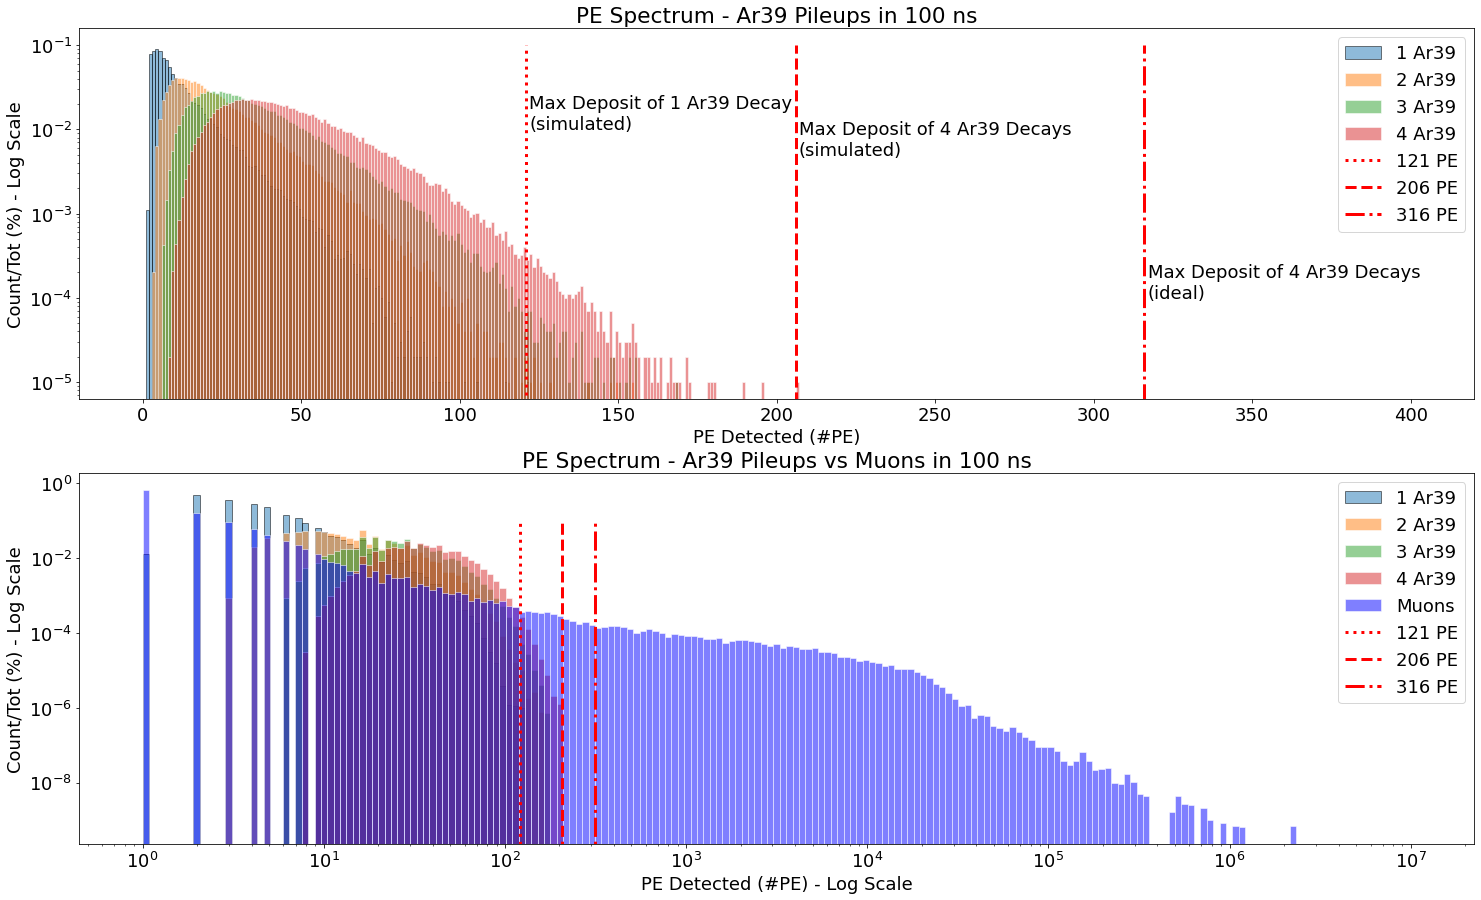

In [83]:
alpha=0.5
ar39_max_energy = 565
best_eff = 0.0035

plt.subplot(2, 1, 1)
bins = np.linspace(0, 400, 401)
plt.hist(groupby_event_df1.pedetected, bins=bins, label="1 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.hist(groupby_event_df2.pedetected, bins=bins, label="2 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df4.pedetected, bins=bins, label="4 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.vlines(x=groupby_event_df1.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dotted', linewidth=3, label="{} PE".format(groupby_event_df1.pedetected.max()))
plt.vlines(x=groupby_event_df4.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dashed', linewidth=3, label="{} PE".format(groupby_event_df4.pedetected.max()))
plt.vlines(x=int(4*ar39_max_energy*40*best_eff), ymin=0, ymax=0.1, color='r', linestyles='dashdot', linewidth=3, label="{} PE".format(int(4*ar39_max_energy*40*best_eff)))
plt.title("PE Spectrum - Ar39 Pileups in 100 ns")
plt.xlabel("PE Detected (#PE)")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.text(121+1, 0.01, "Max Deposit of 1 Ar39 Decay\n(simulated)")
plt.text(206+1, 0.005, "Max Deposit of 4 Ar39 Decays\n(simulated)")
plt.text(316+1, 0.0001, "Max Deposit of 4 Ar39 Decays\n(ideal)")
plt.legend()

plt.subplot(2, 1, 2)
bins = np.logspace(0, 7, 200)
plt.hist(groupby_event_df1.pedetected, bins=bins, label="1 Ar39", density=True, edgecolor='k', alpha=alpha)
plt.hist(groupby_event_df2.pedetected, bins=bins, label="2 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df4.pedetected, bins=bins, label="4 Ar39", density=True, edgecolor='w', alpha=alpha)
plt.hist(groupby_event_muons.pedetected, bins=bins, label="Muons", density=True, edgecolor='w', alpha=alpha, color='b')
plt.vlines(x=groupby_event_df1.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dotted', linewidth=3, label="{} PE".format(groupby_event_df1.pedetected.max()))
plt.vlines(x=groupby_event_df4.pedetected.max(), ymin=0, ymax=0.1, color='r', linestyles='dashed', linewidth=3, label="{} PE".format(groupby_event_df4.pedetected.max()))
plt.vlines(x=int(4*ar39_max_energy*40*best_eff), ymin=0, ymax=0.1, color='r', linestyles='dashdot', linewidth=3, label="{} PE".format(int(4*ar39_max_energy*40*best_eff)))
plt.title("PE Spectrum - Ar39 Pileups vs Muons in 100 ns")
plt.xlabel("PE Detected (#PE) - Log Scale")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.xscale('log')
#plt.text(121+1, 0.01, "Max Deposit of 1 Ar39 Decay\n(simulated)")
#plt.text(206+1, 0.005, "Max Deposit of 4 Ar39 Decays\n(simulated)")
#plt.text(316+1, 0.001, "Max Deposit of 4 Ar39 Decays\n(ideal)")


plt.legend()
plt.show()

In [35]:
k_leq_121 = 0
tot = 0
print("Fraction of pileup events that deposit < 121 PE in 100ns:")
for i, gb in enumerate([groupby_event_df1, groupby_event_df2, groupby_event_df3, groupby_event_df4]):
    k_leq_121 += len(gb[gb.pedetected<=121])
    tot += len(gb)
    print("  Pileup {} Ar39s: {} / {} -> {:.2f}%".format(i+1, len(gb[gb.pedetected<=121]), len(gb), len(gb[gb.pedetected<=121])/len(gb)*100))

Fraction of pileup events that deposit < 121 PE in 100ns:
  Pileup 1 Ar39s: 99999 / 99999 -> 100.00%
  Pileup 2 Ar39s: 99989 / 100000 -> 99.99%
  Pileup 3 Ar39s: 99921 / 100000 -> 99.92%
  Pileup 4 Ar39s: 99598 / 100000 -> 99.60%


In [72]:
# compute subset of muons (all, ideal cut, simulated cut)
ideal_marginals_events = groupby_event_df[groupby_event_df.pedetected <= 316].index.unique()
simulated_marginals_events = groupby_event_df[groupby_event_df.pedetected <= 206].index.unique()

ideal_marginal_df = df[df.eventnumber.isin(ideal_marginals_events)]
idealmarginals_groupby_event = ideal_marginal_df.groupby("eventnumber").sum()

simulated_marginal_df = df[df.eventnumber.isin(simulated_marginals_events)]
simulatedmarginals_groupby_event = simulated_marginal_df.groupby("eventnumber").sum()

In [73]:
# Compute std dev of muons
stddev_all = groupby_event_muons.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
stddev_idealmarginals = idealmarginals_groupby_event.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
stddev_simulatedmarginals = simulatedmarginals_groupby_event.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

In [55]:
# Compute std dev of ar39 pileups
std_event_df1 = groupby_event_df1.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df2 = groupby_event_df2.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df3 = groupby_event_df3.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df4 = groupby_event_df4.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

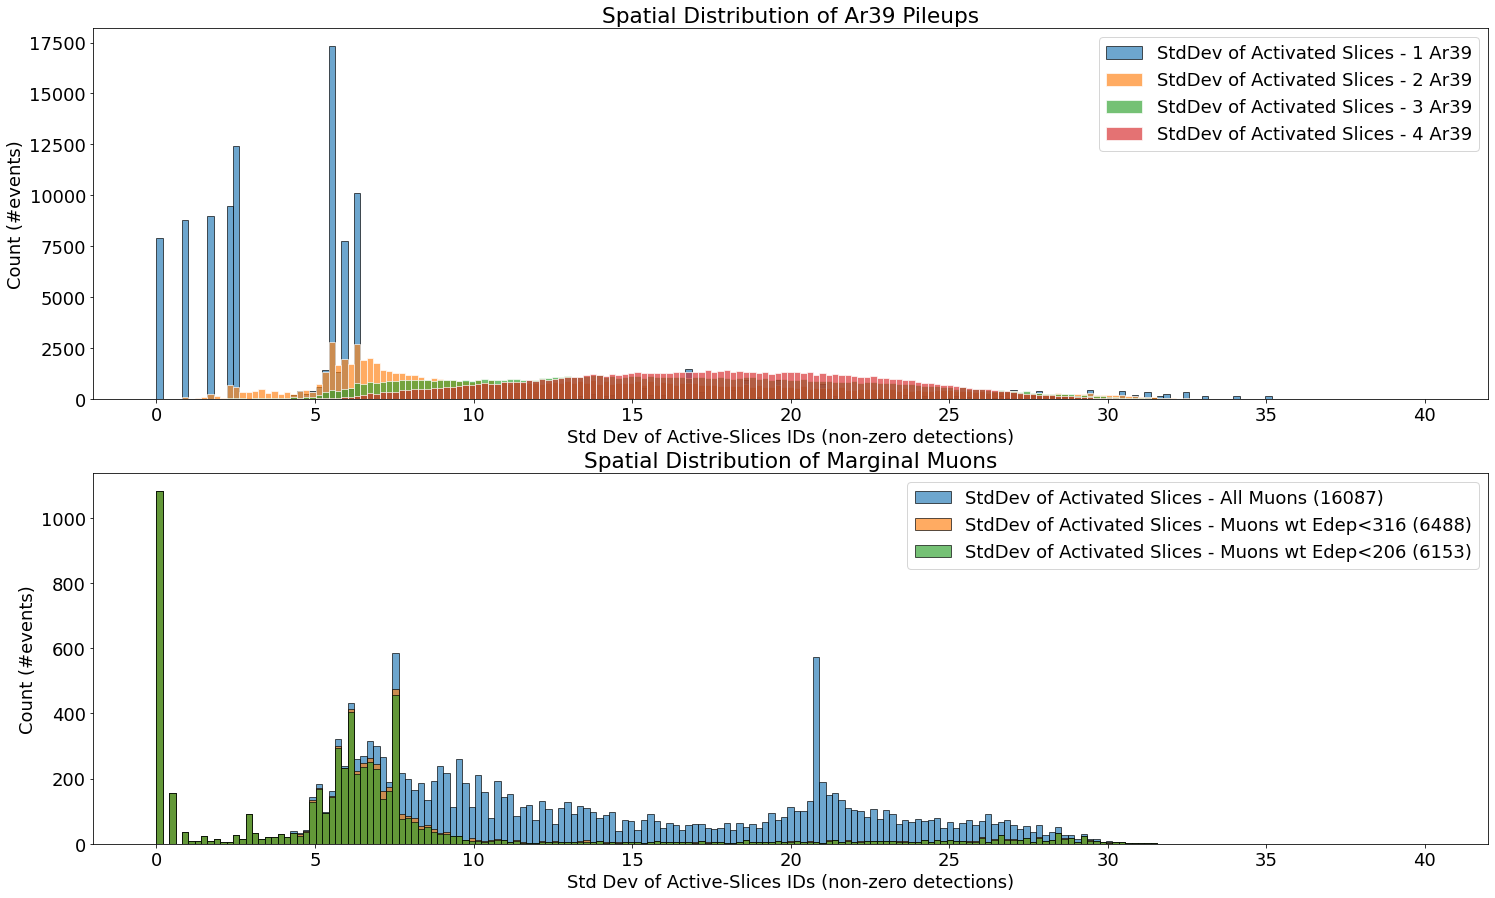

In [81]:
alpha=0.65

plt.subplot(2, 1, 1)
bins = np.linspace(0, 40, 200)
plt.title("Spatial Distribution of Ar39 Pileups")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("Count (#events)")
plt.hist(std_event_df1, bins=bins, label="StdDev of Activated Slices - 1 Ar39", density=False, edgecolor='k', alpha=alpha)
plt.hist(std_event_df2, bins=bins, label="StdDev of Activated Slices - 2 Ar39", density=False, edgecolor='w', alpha=alpha)
plt.hist(std_event_df3, bins=bins, label="StdDev of Activated Slices - 3 Ar39", density=False, edgecolor='w', alpha=alpha)
plt.hist(std_event_df4, bins=bins, label="StdDev of Activated Slices - 4 Ar39", density=False, edgecolor='w', alpha=alpha)
plt.legend()

plt.subplot(2, 1, 2)
bins = np.linspace(0, 40, 200)
plt.title("Spatial Distribution of Marginal Muons")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("Count (#events)")
plt.hist(stddev_all, bins=bins, label="StdDev of Activated Slices - All Muons (16087)", density=False, edgecolor='k', alpha=alpha)
plt.hist(stddev_idealmarginals, bins=bins, label="StdDev of Activated Slices - Muons wt Edep<316 (6488)", density=False, edgecolor='k', alpha=alpha)
plt.hist(stddev_simulatedmarginals, bins=bins, label="StdDev of Activated Slices - Muons wt Edep<206 (6153)", density=False, edgecolor='k', alpha=alpha)
plt.legend()
plt.show()